In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mlxtend

In [2]:
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
%matplotlib inline

In [3]:
movies=pd.read_csv("my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


THE FIRST 4 COLUMNS IS JUST THE MOIVES NAME SO CAN BE DROPPED FROM THE DATASET FOR FURTHER PROCESS

In [4]:
movies1=movies.iloc[:,5:]
movies1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [5]:
movies1.shape

(10, 10)

In [6]:
movies1.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
movies1.fillna("0",inplace=True)

In [8]:
movies1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [9]:
# lets count the movies
for i in movies1.columns:
    print(i)
    print(movies1[i].value_counts(),end='\t\n')
    print()

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64	

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64	

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64	

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64	

Patriot
1    6
0    4
Name: Patriot, dtype: int64	

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64	

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64	

LOTR
0    9
1    1
Name: LOTR, dtype: int64	

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64	

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64	



In [14]:
# since the dataset is in transaction format no need to use the transaction encoder
frequents_items=apriori(movies1,min_support=0.1,use_colnames=True)
frequents_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [15]:
# lets check the support values for the movies1 dataset frequency of occurance
rules_s=association_rules(frequents_items,metric='support',min_threshold=.1)
rules_s

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
246,(Green Mile),"(Harry Potter1, Sixth Sense, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR1),"(Harry Potter1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(LOTR2),"(Harry Potter1, Sixth Sense, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [17]:
# lets check for the confidence parameter in movies1 dataset frequency for occurance
rules_c=association_rules(frequents_items,metric='confidence',min_threshold=.1)
rules_c

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
246,(Green Mile),"(Harry Potter1, Sixth Sense, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR1),"(Harry Potter1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(LOTR2),"(Harry Potter1, Sixth Sense, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [ ]:
# lets sort the support values in ascending  for 10 rows
rules_s.sort_values('support',ascending=True)[0:10]


In [ ]:
# check for different values for support
rules_s[(rules_s.support>=0.5) | (rules_s.support==0.1 )]

In [24]:
# lets check for the different confidence parameters values

rules_c.groupby("antecedents")[["confidence"]].mean()

,confidence
antecedents,
(Sixth Sense),0.246377
"(Green Mile, LOTR2)",1.000000
"(LOTR, Green Mile)",1.000000
"(Braveheart, Gladiator)",1.000000
"(Braveheart, Patriot)",1.000000
(LOTR2),0.533333
"(LOTR, Sixth Sense, Green Mile)",1.000000
"(LOTR, Sixth Sense, Gladiator)",1.000000
"(LOTR, Green Mile, Gladiator)",1.000000


In [81]:
rules_c[(rules_c.confidence==0.8)| (rules_c.confidence==.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
5,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
9,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
20,(Green Mile),(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6
22,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.5,2.500000,0.06,1.6
...,...,...,...,...,...,...,...,...,...
242,"(Sixth Sense, Green Mile)","(LOTR2, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.5,5.000000,0.08,1.8
245,(LOTR2),"(Sixth Sense, Harry Potter1, Green Mile, LOTR1)",0.2,0.1,0.1,0.5,5.000000,0.08,1.8
246,(Harry Potter1),"(Sixth Sense, LOTR2, Green Mile, LOTR1)",0.2,0.1,0.1,0.5,5.000000,0.08,1.8
247,(Green Mile),"(Sixth Sense, LOTR2, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.5,5.000000,0.08,1.8


LETS CHECK WITH DIFFERNT TYPES OF PLOTS

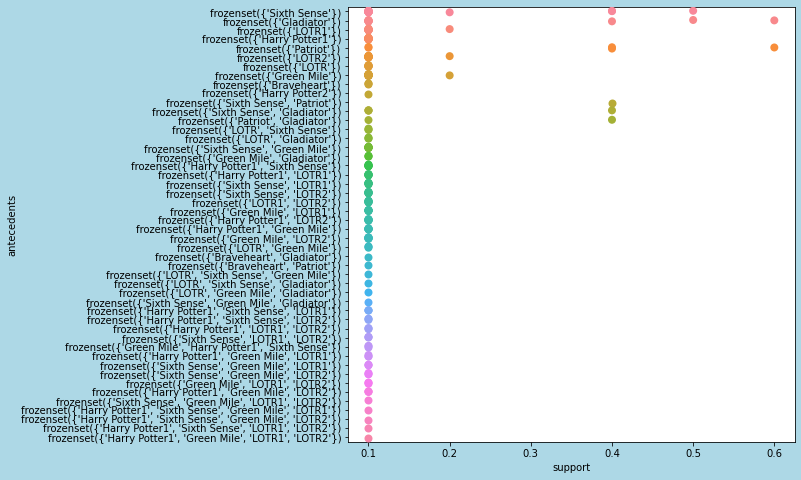

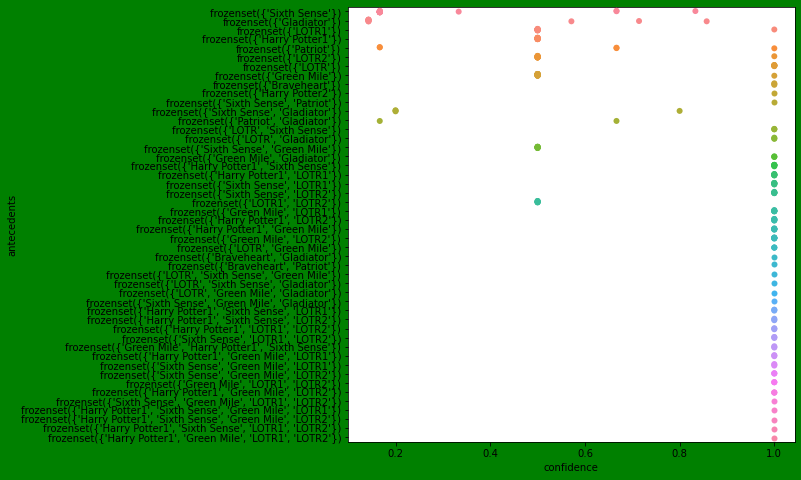

In [77]:
# lets check with strip plots for support and confidence
rules_s.head(3)
plt.figure(figsize=(8,8),facecolor='lightblue',edgecolor='black')
sns.stripplot(x=rules_s.support,y=rules_s.antecedents,data=rules_s,size=8) # for support values
plt.figure(figsize=(8,8),facecolor='green',edgecolor='red')
sns.stripplot(x=rules_c.confidence,y=rules_c.antecedents,data=rules_c,size=6) # for confidence values
plt.show()

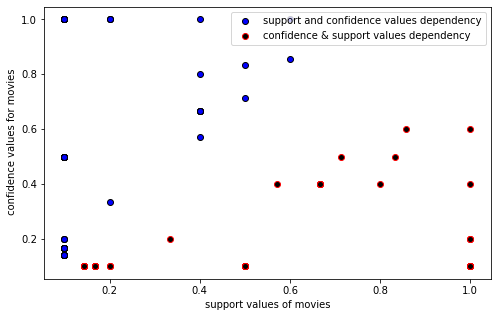

In [82]:
# lets plot scatter plot betwwen support and confidence
X_s=rules_s.support    # support as priority
Y_s=rules_s.confidence
plt.figure(figsize=(8,5))
plt.xlabel("support values of movies")
plt.ylabel(" confidence values for movies")
plt.scatter(X_s,Y_s,color="blue",label="support and confidence values dependency",edgecolor="black")


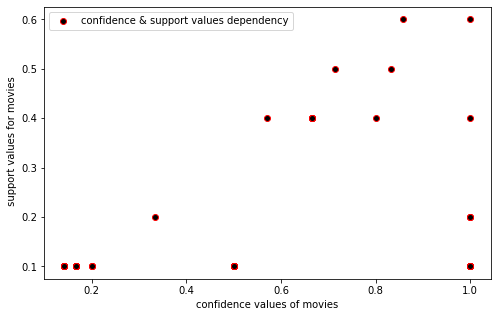

In [113]:
plt.figure(figsize=(8,5))
X_c=rules_c.confidence    #  confidence as priority
Y_c=rules_c.support
plt.xlabel("confidence values of movies")
plt.ylabel(" support values for movies")
plt.scatter(X_c,Y_c,color="black",label="confidence & support values dependency",edgecolor="red")
plt.legend()
plt.show()

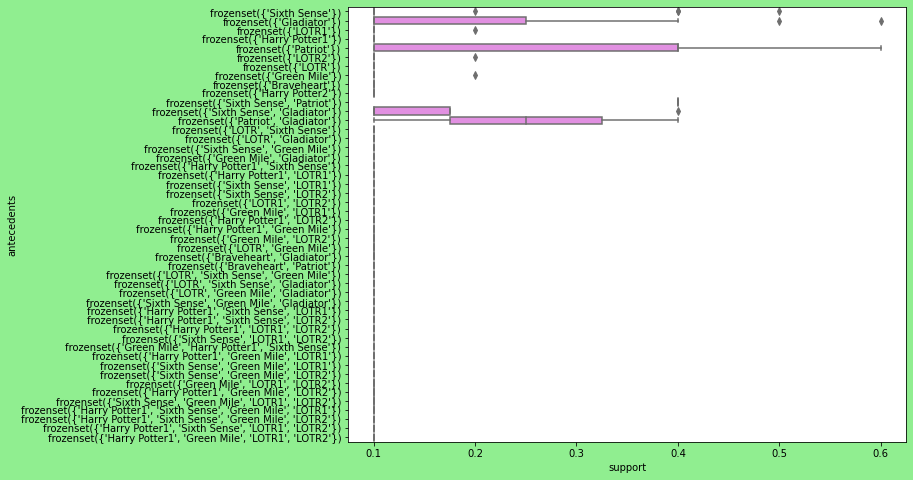

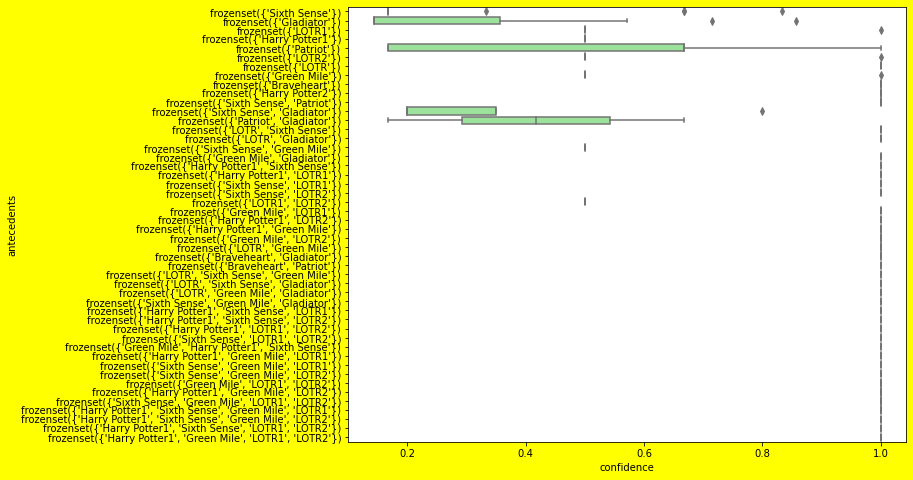

In [86]:
# boxplots for support values and confidence values
plt.figure(figsize=(10,8),facecolor="lightgreen",edgecolor="black")
sns.boxplot(x=rules_s.support,y=rules_s.antecedents, color="violet")
plt.figure(figsize=(10,8),facecolor="yellow",edgecolor="black")
sns.boxplot(x=rules_c.confidence,y=rules_c.antecedents,color="lightgreen")
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


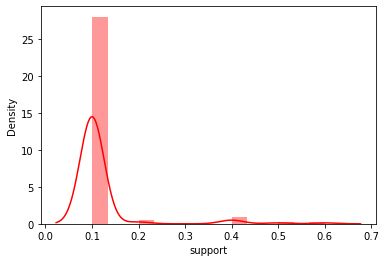

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


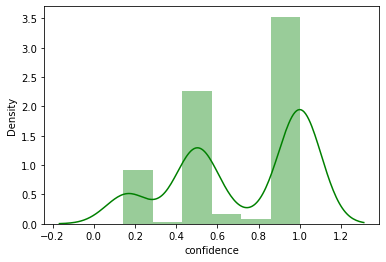

In [88]:
# distplot for both support nad confidence
sns.distplot(rules_s.support,color="red")
plt.show()
sns.distplot(rules_c.confidence,color='green')
plt.show()

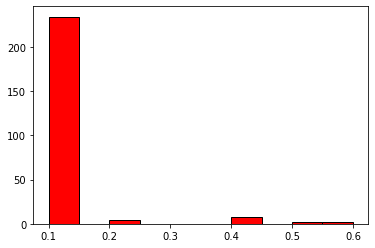

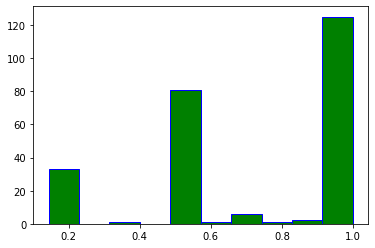

In [92]:
# histogram plots for support and confidence
plt.hist(rules_s.support,color="red",edgecolor="black")
plt.show()
plt.hist(rules_c.confidence,color='green',edgecolor="blue")
plt.show()

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

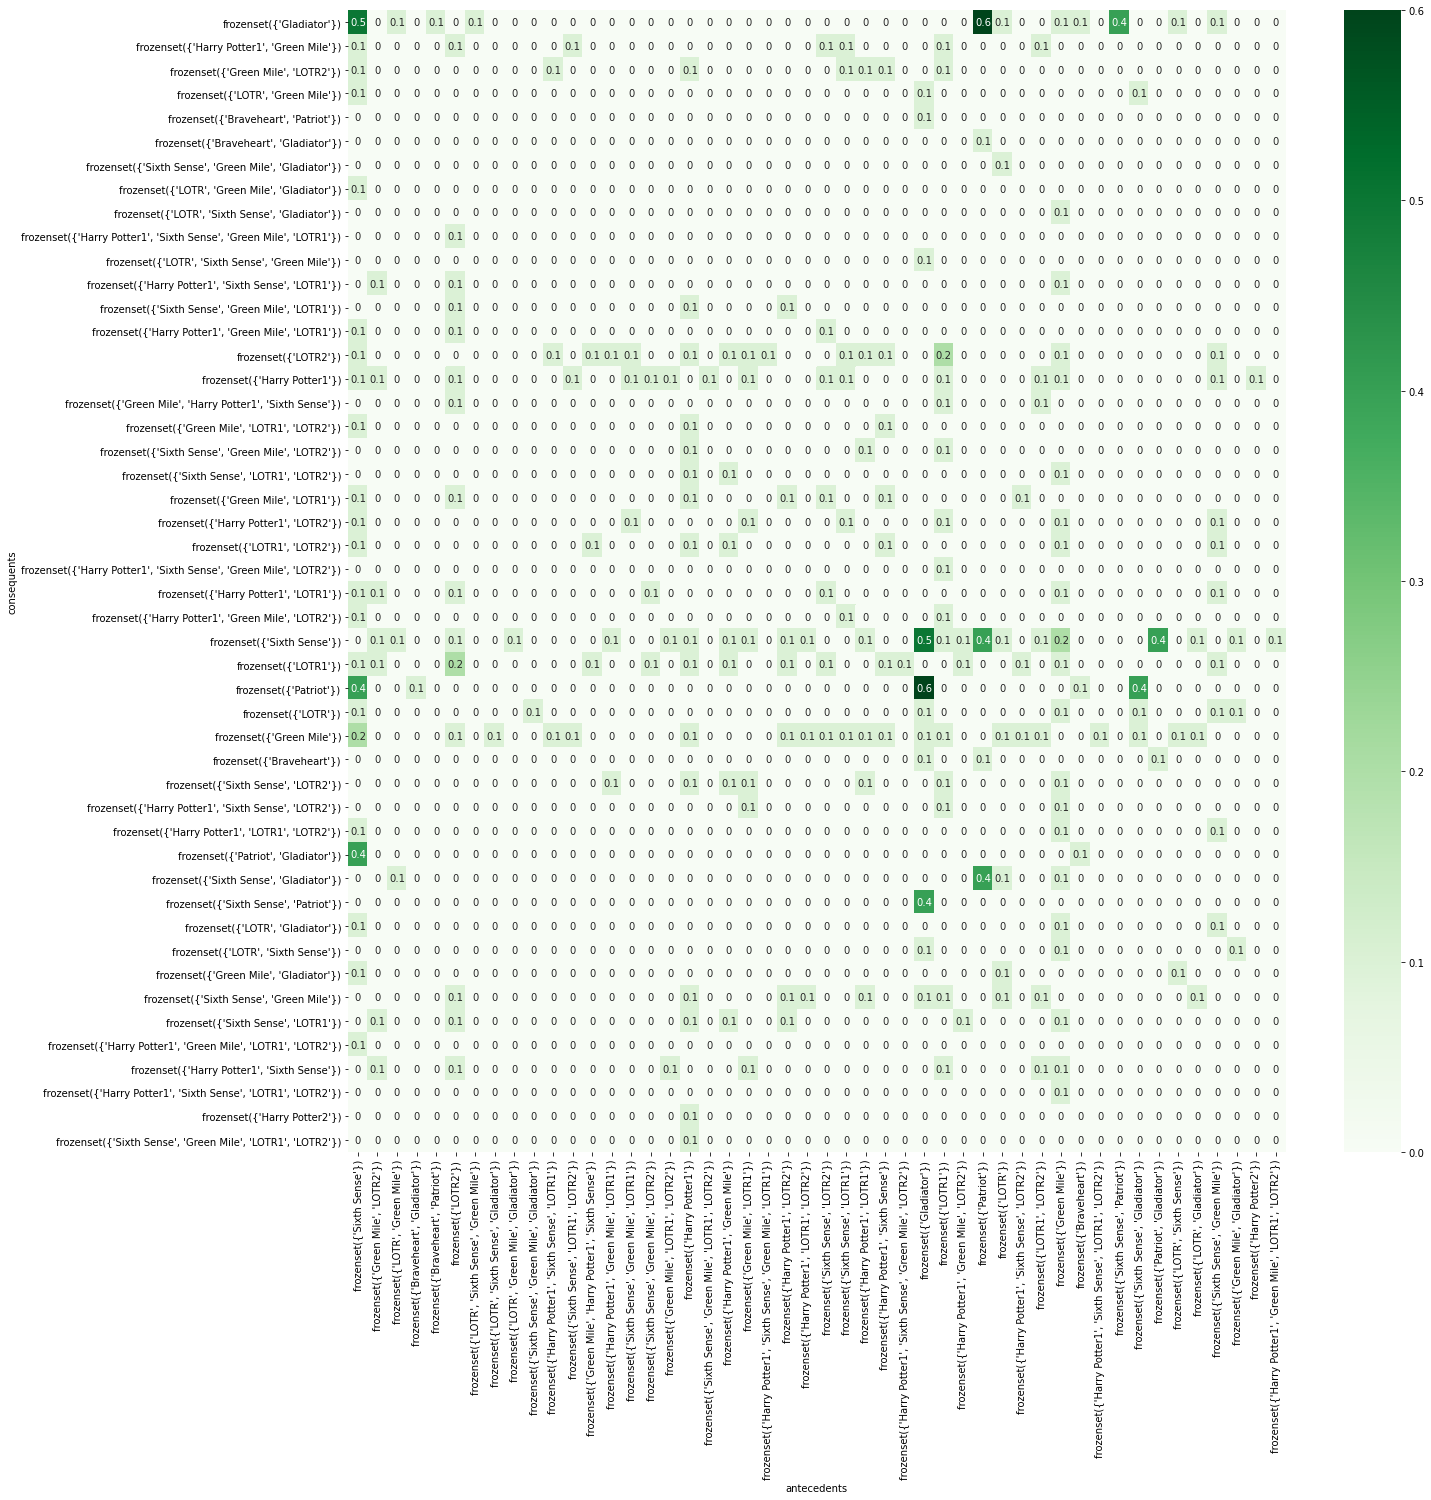

In [108]:
# heat map for support values
plt.figure(figsize=(21,21))
heatmap_support=pd.pivot_table(data=rules_s,values="support",index="consequents",columns="antecedents",aggfunc="sum",fill_value=0)
sns.heatmap(heatmap_support,annot=True,cmap="Greens",fmt=".5g",linecolor="Red")

<AxesSubplot:xlabel='support', ylabel='antecedents'>

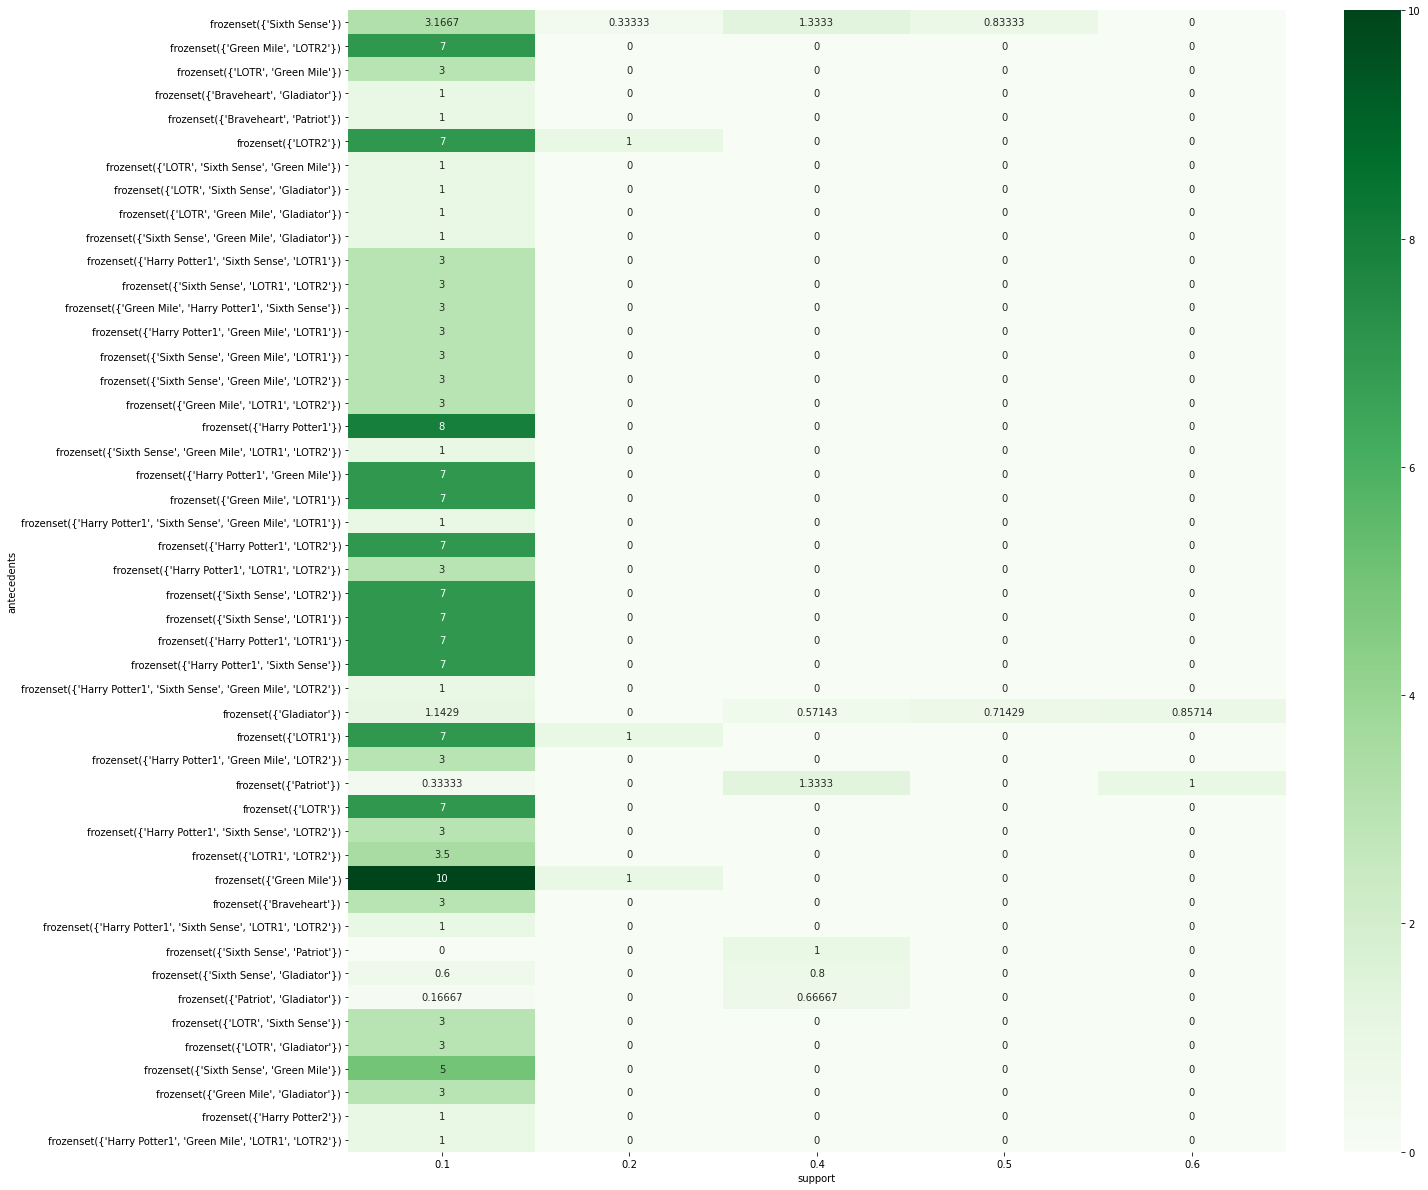

In [109]:
# heat map for confidence values
plt.figure(figsize=(21,21))
heatmap_confidence=pd.pivot_table(data=rules_s,values="confidence",index="antecedents",columns="support",aggfunc="sum",fill_value=0)
sns.heatmap(heatmap_confidence,annot=True,cmap="Greens",fmt=".5g",linecolor="Red")